### Análisis exploratorio inicial
* Visualizar las primeras filas.
* Realizar un resumen de 5 números.

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns

In [66]:
lego_df = pd.read_csv('./data/lego_df.csv')

In [67]:
lego_df.head()

,set_num,set_name,year,theme_id,num_parts,theme_name,parent_id,inv_id,inv_version,part_num,color_id,quantity,is_spare,color_name,rgb,is_trans,part_name,part_cat_id
0,00-1,Weetabix Castle,1970,414,471,Castle,411.0,5574,1,29c01,4,8,f,Red,C91A09,f,Window 1 x 1 x 2 with Glass,16.0
1,00-1,Weetabix Castle,1970,414,471,Castle,411.0,5574,1,3001a,4,9,f,Red,C91A09,f,Window 1 x 1 x 2 with Glass,16.0
2,00-1,Weetabix Castle,1970,414,471,Castle,411.0,5574,1,3002a,4,6,f,Red,C91A09,f,Window 1 x 1 x 2 with Glass,16.0
3,00-1,Weetabix Castle,1970,414,471,Castle,411.0,5574,1,3004,4,22,f,Red,C91A09,f,Window 1 x 1 x 2 with Glass,16.0
4,00-1,Weetabix Castle,1970,414,471,Castle,411.0,5574,1,3005,4,2,f,Red,C91A09,f,Brick 2 x 4 without Cross Supports,11.0


In [68]:
lego_df.describe()

,year,theme_id,num_parts,parent_id,inv_id,inv_version,color_id,quantity,part_cat_id
count,580069.000000,580069.000000,580069.000000,372382.000000,580069.000000,580069.000000,580069.000000,580069.000000,580069.000000
mean,2005.696581,274.150773,506.894678,205.023180,8605.754931,1.001600,78.455991,3.325185,20.174191
std,10.861963,190.348649,606.313524,168.494473,4958.354287,0.043279,622.331027,8.230996,13.621646
min,1950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000
25%,2001.000000,100.000000,134.000000,52.000000,4352.000000,1.000000,1.000000,1.000000,11.000000
50%,2009.000000,236.000000,328.000000,158.000000,8637.000000,1.000000,15.000000,2.000000,14.000000
75%,2014.000000,466.000000,665.000000,324.000000,12794.000000,1.000000,71.000000,4.000000,27.000000
max,2017.000000,614.000000,5922.000000,580.000000,18708.000000,5.000000,9999.000000,1440.000000,57.000000


In [69]:
lego_df.dtypes

set_num         object
set_name        object
year             int64
theme_id         int64
num_parts        int64
theme_name      object
parent_id      float64
inv_id           int64
inv_version      int64
part_num        object
color_id         int64
quantity         int64
is_spare        object
color_name      object
rgb             object
is_trans        object
part_name       object
part_cat_id    float64
dtype: object

#### Tipos de datos
* Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si
es informativa para un problema de clasificación (por ejemplo si se trata de un código, como
una matrícula, o un nombre propio).
* Identificar las variables de entrada y de salida del problema.

Variables categóricas:
* set_num,         object
* set_name,        object
* theme_id,        int64
* theme_name,      object
* parent_id,      float64
* inv_id,           int64
* inv_version,      int64
* part_num,        object
* color_id,         int64
* is_spare,        object
* color_name,      object
* rgb,             object
* is_trans,        object
* part_name,       object
* part_cat_id,    float64

Variables numéricas discretas:
* year,             int64
* quantity,         int64
* num_parts,        int64


#### Identificación de variables de entrada y de salida:
Nuestro objetivo es predecir la temática de un set, de modo que la variable de salida será **theme_id.**

La predicción se hará en base al contenido del set, por lo que las variables de entrada que nos servirán para este problema de clasificación múltiple son: 
* year, quantity (numéricas)
* inv_id, inv_version, is_spare, color_id, part_cat_id(categóricas).

Las variables *color_name* y *rgb* también son informativas, pero decidimos trabajar únicamente con el *color_id*.
Part_num es una variable de una cardinalidad muy alta con el doble de columnas que el total de rows. Para ello decidimos utilizar part_cat_id que tiene una cardinalidad más baja.

#### Variables de entrada:
* Realizar los siguientes análisis por tipo de variable:
* Numéricas: Obtener conclusiones acerca de la distribución de los datos.
* Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada
categoría, etc.
* Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver?

##### Distribución de variables numéricas

array([[<AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'num_parts'}>],
       [<AxesSubplot:title={'center':'quantity'}>]], dtype=object)

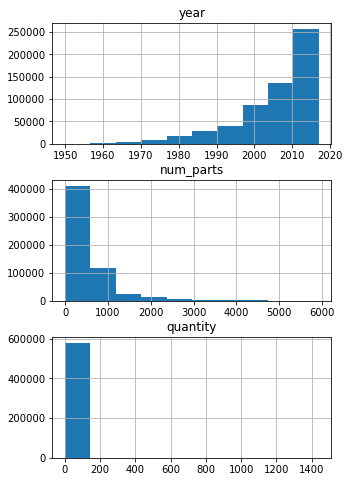

In [70]:
lego_df.hist(column=["year", "num_parts", "quantity"], layout=(3,1), figsize=(5, 8))

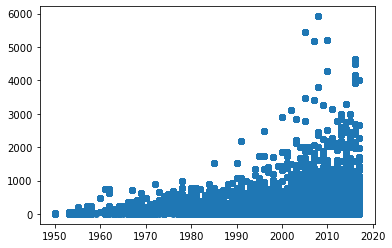

In [71]:
#Evolución en el tiempo del número de piezas de cada set
year = np.array(lego_df.year)
num = np.array(lego_df.num_parts)

plt.scatter(year,num) 
plt.show()

A partir de la distribución de las variables numéricas podemos observar que los datos tienen una distrubición asimétrica negativa con respecto a la variable year (left skewed). Esto coincide con la evolución en el tiempo del número de piezas de cada set, tal como se ve en el scatter plot, donde se observa que la distribución también es asimétrica negativa. 

 Mientras que se presenta una asimetría positiva (right skewed) con la variable num_parts. Esto es, el número de partes que compone un set está mayormente distribuido en los valores de 0 a 1000.


#### Distribución variables categóricas

A continuación vemos cómo la gran mayoría de las variables, a excepción de inv_version e is_spare, tienen alta cardinalidad. 
Proponemos trabajar

In [90]:
#Cardinalidad: 
print('valores unicos de version: ', lego_df.inv_version.nunique()) #version, baja cardinalidad
print('valores unicos de part_num: ', lego_df.part_num.nunique()) #part_num alta cardinalidad
print('valores unicos de is_spare: ', lego_df.is_spare.nunique()) #is_spare baja cardinalidad
print('valores unicos de part_cat_id: ', lego_df.part_cat_id.nunique())
print('valores unicos de inventory id: ', lego_df.inv_id.nunique()) #inv_id alta cardinalidad
print('valores unicos de color_id: ', lego_df.color_id.nunique()) #color_id alta cardinalidad

valores unicos de version:  5
valores unicos de part_num:  23109
valores unicos de is_spare:  2
valores unicos de part_cat_id:  57
valores unicos de inventory id:  10724
valores unicos de color_id:  119


array([[<AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'num_parts'}>],
       [<AxesSubplot:title={'center':'quantity'}>]], dtype=object)

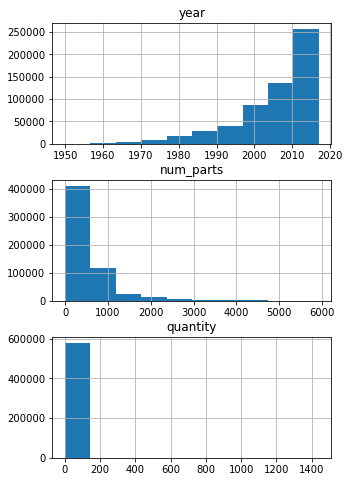

In [95]:
# Distribución de datos numéricos
lego_df.hist(column=["year", "num_parts", "quantity"], layout=(3,1), figsize=(5, 8))

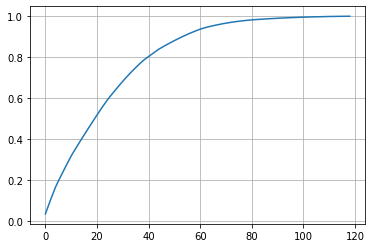

In [163]:
# Distribuciín acumulada de datos categóricos.
# color_id: el 90% de los themes está representado por aprox 60 colores.

x_color_id = lego_df.groupby("color_id").agg({"theme_name": "nunique"}).theme_name.sort_values(ascending=False)
plt.plot((x_color_id / x_color_id.sum()).cumsum().values)
plt.grid()

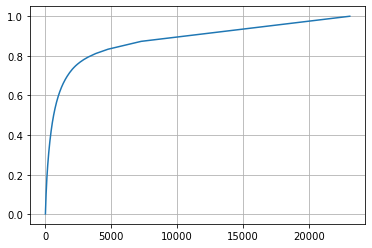

In [164]:
#part_num: el 90% de los themes está representado por 13k part_num aprox.

x_part_num_id = lego_df.groupby("part_num").agg({"theme_name": "nunique"}).theme_name.sort_values(ascending=False)
plt.plot((x_part_num_id / x_part_num_id.sum()).cumsum().values)
plt.grid()

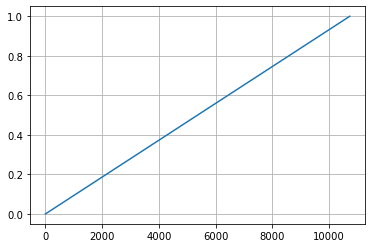

In [165]:
# inventory_id: el 

x_inv_id = lego_df.groupby("inv_id").agg({"theme_name": "nunique"}).theme_name.sort_values(ascending=False)
plt.plot((x_inv_id / x_inv_id.sum()).cumsum().values)
plt.grid()

In [168]:
lego_df['inv_id'].value_counts()

1305     769
12397    700
8461     687
16139    593
14208    592
        ... 
2353       1
597        1
16097      1
9522       1
2793       1
Name: inv_id, Length: 10724, dtype: int64

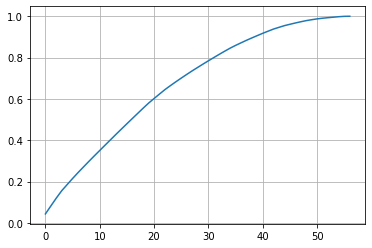

In [166]:
# part_cat_id: el 90% de los themes está representado por aprox 40 inv_id

x_part_cat_id = lego_df.groupby("part_cat_id").agg({"theme_name": "nunique"}).theme_name.sort_values(ascending=False)
plt.plot((x_part_cat_id / x_part_cat_id.sum()).cumsum().values)
plt.grid()

In [161]:
x_color_id.head(60)

color_id
0       373
15      363
4       350
1       342
14      332
2       271
36      267
47      259
19      256
71      254
72      254
46      216
34      214
25      214
41      209
9999    207
33      206
57      205
272     202
70      202
179     201
320     195
42      193
7       188
27      184
28      168
8       161
297     158
40      158
288     155
182     152
73      146
484     144
308     142
6       131
10      131
191     128
148     123
135     115
84      102
80       95
383      94
379      94
378      94
85       94
78       75
334      74
143      73
5        72
29       69
45       68
82       66
326      64
35       64
322      62
226      60
321      57
52       54
212      53
89       52
Name: theme_name, dtype: int64

In [156]:
lego_df.groupby("color_id").agg({"theme_name": "nunique"})

,theme_name
color_id,
-1,27
0,373
1,342
2,271
3,27
...,...
1000,22
1002,3
1003,4


#### Variables de salida (en caso de aplicar):
* ¿Están balanceadas las clases?
* (en caso de aplicar) ¿Qué técnicas consideraría para codificar la variable de salida?
Justifique.

No consideramos ninguna técnica para codificar la variable de salida pues vamos a trabajar con el theme_id que es un entero.